In [1]:
import os                           # for testing use only
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt      
import math
import seaborn as sns
from collections import Counter
from sklearn.decomposition import PCA
from scipy.stats import chi2_contingency
import time

# sklearn imports
# helper for logistic regression explanations
from scipy.special import expit
from scipy.special import logit

# visualization libraries 
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)



from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split
# --------cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# -------- classification
import sklearn
from sklearn import neighbors, tree, ensemble, naive_bayes, svm
# *** KNN
from sklearn.neighbors import KNeighborsClassifier
# *** Decision Tree; Random Forest
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# *** Naive Bayes
from sklearn.naive_bayes import GaussianNB
# *** SVM classifier
from sklearn.svm import SVC
# --------  metrics:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import make_scorer

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [ ]:
url = "https://play.google.com/store/apps?hl=en_US"
basic_url = "https://play.google.com"
response = requests.get(url)
time_for_sleep = 0
dir = "C:/Users/davidr241194/Documents/jupyter_notebook/GoogleAppStore.csv"

In [ ]:
def scrape_apps(html_file_name):
    soup = BeautifulSoup(response.content, "html.parser")
    category = soup.find("div", attrs={"class": "LNKfBf"})
    link_to_genre_page = [t['href'] for t in category.findAll("a")]
    genre_name = [t.text for t in category.findAll("a")]
    for x in link_to_genre_page:
        title = []
        gen = []
        rating = []
        rating_count = []
        number_of_installs = []
        price = []
        free_l = []
        size = []
        print("For category:" + x)
        time.sleep(time_for_sleep)
        new_response = requests.get(basic_url + x)
        soup_seemore = BeautifulSoup(new_response.content, "html.parser")
        see_more_div = soup_seemore.findAll("div", attrs={"class": "xwY9Zc"})
        for q in see_more_div:
            see_more_link = [t['href'] for t in q.findAll("a")]
            for w in see_more_link:
                apps_link = []
                time.sleep(time_for_sleep)
                apps_response = requests.get(basic_url + w)
                soup_apps = BeautifulSoup(apps_response.content, "html.parser")
                apps_div = soup_apps.findAll("div", attrs={"class": "wXUyZd"})
                for e in apps_div:
                    apps_link = [t['href'] for t in e.findAll("a")]
                    for r in apps_link:
                        apps_main_request = requests.get(basic_url + r)
                        soup_apps_main = BeautifulSoup(apps_main_request.content, "html.parser")
                        try:
                            title.append(soup_apps_main.find("h1", attrs={"class": "AHFaub"}).get_text())
                        except:
                            title.append("n/a")
                            print("Error during title append")
                        try:
                            gen.append(soup_apps_main.find("div", attrs={"class": "qQKdcc"}).get_text())
                        except:
                            gen.append("n/a")
                            print("Error during gen append")
                        try:
                            rating.append(soup_apps_main.find("div", attrs={"class": "BHMmbe"}).get_text())
                        except:
                            rating.append("n/a")
                            print("Error during rating append")
                        try:
                            rating_count.append(soup_apps_main.find("div", attrs={"class": "dNLKff"}).get_text())
                        except:
                            rating_count.append("n/a")
                        try:
                            price_scarp = soup_apps_main.find("span", attrs={"class": "oocvOe"}).get_text()
                        except:
                            print("Error during price scarp")
                            price_scarp = "n/a"
                        num_of_ins = soup_apps_main.findAll("span", attrs={"class": "htlgb"})
                        if price_scarp == "n/a":
                            price.append("n/a")
                            free_l.append("n/a")

                        if price_scarp == "Install":
                            free = True
                            free_l.append(free)
                            price.append(0)
                            try:
                                size.append(num_of_ins[3].get_text())
                                number_of_installs.append(num_of_ins[4].get_text())
                            except:
                                number_of_installs.append("n/a")
                                print("Error during number_of_installs append")
                        else:
                            free = False
                            free_l.append(free)
                            try:
                                size.append(num_of_ins[3].get_text())
                                number_of_installs.append(num_of_ins[6].get_text())
                            except:
                                number_of_installs.append("n/a")
                                print("Error during number_of_installs append")
                            price.append(price_scarp)
                print("Next see more link")
        print(f"len_title: {len(title)}, len_rating_count: {len(rating_count)}, len_free_count: {len(free_l)}")
        df = pd.DataFrame({"App": title, "Category": gen, "Rating": rating, "Reviews": rating_count, "Size":size,
                           "Installs": number_of_installs,"Free/Paid": free_l ,"Price": price })
        df.to_csv(dir, mode='a', header=False)

In [ ]:
scrape_apps(response)

In [2]:
def load_csv(file_name):
    df = pd.read_csv(file_name, header=0, sep=',') 
    return df

In [3]:
file_name = 'C:/Users/davidr241194/Documents/jupyter_notebook/GoogleAppStore.csv'
df = load_csv(file_name)

In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Free/Paid,Price
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   App        10841 non-null  object 
 1   Category   10841 non-null  object 
 2   Rating     9367 non-null   float64
 3   Reviews    10841 non-null  object 
 4   Size       10841 non-null  object 
 5   Installs   10841 non-null  object 
 6   Free/Paid  10840 non-null  object 
 7   Price      10841 non-null  object 
dtypes: float64(1), object(7)
memory usage: 677.7+ KB


In [6]:
df.isnull().sum()

App             0
Category        0
Rating       1474
Reviews         0
Size            0
Installs        0
Free/Paid       1
Price           0
dtype: int64

In [7]:
data_f = df.copy()

In [8]:
data_f[data_f['Free/Paid'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Free/Paid,Price
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0


In [9]:
data_f.iloc[9148,6] = 'Free'

In [10]:
data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   App        10841 non-null  object 
 1   Category   10841 non-null  object 
 2   Rating     9367 non-null   float64
 3   Reviews    10841 non-null  object 
 4   Size       10841 non-null  object 
 5   Installs   10841 non-null  object 
 6   Free/Paid  10841 non-null  object 
 7   Price      10841 non-null  object 
dtypes: float64(1), object(7)
memory usage: 677.7+ KB


In [11]:
num_of_rows = len(data_f.axes[0])
thresh_rows = 0.6 * num_of_rows
data_f.dropna(axis=0,thresh=5,inplace = True)
data_f.dropna(axis=1,thresh=thresh_rows,inplace = True)
data_f.fillna(0, inplace=True)
#numeric_col = data_f.select_dtypes(include=['number']).columns
#for col in numeric_col:
#    data_f[col].fillna(0, inplace=True)


In [12]:
data_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10841 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   App        10841 non-null  object 
 1   Category   10841 non-null  object 
 2   Rating     10841 non-null  float64
 3   Reviews    10841 non-null  object 
 4   Size       10841 non-null  object 
 5   Installs   10841 non-null  object 
 6   Free/Paid  10841 non-null  object 
 7   Price      10841 non-null  object 
dtypes: float64(1), object(7)
memory usage: 762.3+ KB


In [13]:
data_f.duplicated().sum()

485

In [14]:
data_f.drop_duplicates(inplace = True)

In [15]:
data_f.duplicated(subset=['App', 'Category', 'Free/Paid', 'Price']).sum()

610

In [16]:
data_f.drop_duplicates(subset=['App', 'Category', 'Free/Paid', 'Price'], keep='first', inplace=True)

In [17]:
data_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9746 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   App        9746 non-null   object 
 1   Category   9746 non-null   object 
 2   Rating     9746 non-null   float64
 3   Reviews    9746 non-null   object 
 4   Size       9746 non-null   object 
 5   Installs   9746 non-null   object 
 6   Free/Paid  9746 non-null   object 
 7   Price      9746 non-null   object 
dtypes: float64(1), object(7)
memory usage: 685.3+ KB


In [18]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [19]:
data_f.head(9390).tail(10)

,App,Category,Rating,Reviews,Size,Installs,Free/Paid,Price
10466,Wi-Fi Networks,PRODUCTIVITY,4.2,115,1.4M,"10,000+",Free,0
10467,FI CFL,FINANCE,3.7,112,3.9M,"10,000+",Free,0
10468,Tassa.fi Finland,LIFESTYLE,3.6,346,7.5M,"50,000+",Free,0
10469,TownWiFi | Wi-Fi Everywhere,COMMUNICATION,3.9,2372,58M,"500,000+",Free,0
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,0
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0
10476,Lennox iComfort Wi-Fi,LIFESTYLE,3.0,552,7.6M,"50,000+",Free,0


In [20]:
data_f = data_f.drop(data_f.loc[data_f.index==10472].index)


In [21]:
data_f.head(9390).tail(10)

,App,Category,Rating,Reviews,Size,Installs,Free/Paid,Price
10466,Wi-Fi Networks,PRODUCTIVITY,4.2,115,1.4M,"10,000+",Free,0
10467,FI CFL,FINANCE,3.7,112,3.9M,"10,000+",Free,0
10468,Tassa.fi Finland,LIFESTYLE,3.6,346,7.5M,"50,000+",Free,0
10469,TownWiFi | Wi-Fi Everywhere,COMMUNICATION,3.9,2372,58M,"500,000+",Free,0
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0
10476,Lennox iComfort Wi-Fi,LIFESTYLE,3.0,552,7.6M,"50,000+",Free,0
10477,Sci-Fi Sounds and Ringtones,PERSONALIZATION,3.6,128,11M,"10,000+",Free,0


In [22]:
data_f['Reviews'] = data_f['Reviews'].replace('[\.]', '', regex=True).replace('[M]', '00000', regex=True).astype(int)

In [23]:
data_f['Size'] = data_f['Size'].replace('[Varies with device]', '', regex=True).replace('[M]', '', regex=True)
data_f['Size'] = pd.to_numeric(data_f['Size'], errors='coerce')

In [24]:
data_f['Installs'] = data_f['Installs'].replace('[,]', '', regex=True).replace('[+]', '', regex=True)
data_f['Installs'] = pd.to_numeric(data_f['Installs'], errors='coerce')

In [25]:
data_f['Price'] = data_f['Price'].replace('[/$/,B,u,y]', '', regex=True)
data_f['Price'] = pd.to_numeric(data_f['Price'], errors='coerce')


In [26]:
data_f.isnull().sum()

App             0
Category        0
Rating          0
Reviews         0
Size         1564
Installs        0
Free/Paid       0
Price           0
dtype: int64

In [27]:
data_f.dropna(inplace=True)
data_f.isnull().sum()


App          0
Category     0
Rating       0
Reviews      0
Size         0
Installs     0
Free/Paid    0
Price        0
dtype: int64

In [30]:
data_f.shape


(8181, 8)

In [31]:
temp_Installs_list = []
tmep_Size_list= []
temp_Price_list = []
temp_Installs_list = data_f['Installs']
tmep_Size_list= data_f['Size']
temp_Price_list = data_f['Price']

In [32]:
data_f['Installs(over then)'] = temp_Installs_list
data_f['Size(M)'] = tmep_Size_list
data_f['Price($)'] = temp_Price_list

In [33]:
data_f.drop(['Size', 'Installs', 'Price'], axis = 'columns', inplace=True)
#ri.drop(['county_name', 'state'], axis='columns', inplace=True)


In [34]:
data_f = data_f[['App', 'Category','Rating','Reviews','Size(M)','Free/Paid','Price($)','Installs(over then)']]

In [35]:
data_f.head()

,App,Category,Rating,Reviews,Size(M),Free/Paid,Price($),Installs(over then)
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,Free,0.0,10000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,Free,0.0,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,Free,0.0,5000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,Free,0.0,50000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,Free,0.0,100000


C:\Users\davidr241194\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating'>

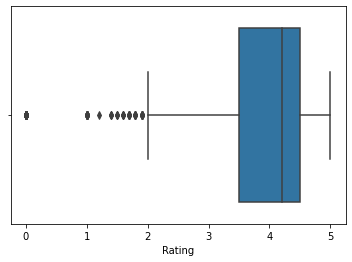

In [36]:
sns.boxplot(data_f['Rating'])

C:\Users\davidr241194\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reviews'>

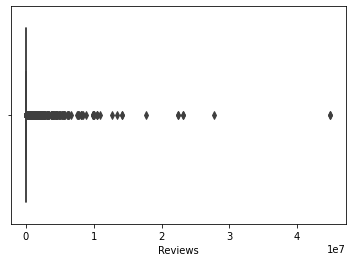

In [37]:
sns.boxplot(data_f['Reviews'])

In [38]:
data_f['Reviews'].describe()

count    8.181000e+03
mean     1.458004e+05
std      1.162325e+06
min      0.000000e+00
25%      1.800000e+01
50%      5.600000e+02
75%      1.836400e+04
max      4.489172e+07
Name: Reviews, dtype: float64

C:\Users\davidr241194\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Size(M)'>

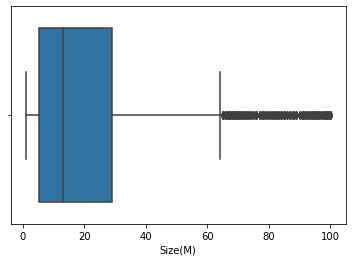

In [39]:
sns.boxplot(data_f['Size(M)'])

C:\Users\davidr241194\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price($)'>

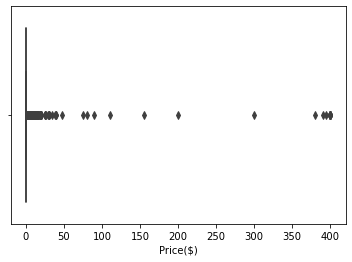

In [40]:
sns.boxplot(data_f['Price($)'])

In [41]:
len(data_f[data_f['Price($)']>50])

22

In [42]:
temp_delete_list =[]
temp_delete_list=data_f[data_f['Price($)']>50].index

In [43]:
temp_delete_list

Int64Index([2253, 2390, 4197, 4362, 4367, 5351, 5354, 5355, 5356, 5357, 5358,
            5362, 5364, 5366, 5369, 5373, 6624, 6692, 9719, 9730, 9917, 9934],
           dtype='int64')

In [44]:
for i in temp_delete_list:
    data_f = data_f.drop(data_f.loc[data_f.index==i].index)
    #data_f = data_f.drop(data_f.loc[data_f.index==10472].index)

In [45]:
len(data_f[data_f['Price($)']>50])

0

In [46]:
data_f.isnull().sum()

App                    0
Category               0
Rating                 0
Reviews                0
Size(M)                0
Free/Paid              0
Price($)               0
Installs(over then)    0
dtype: int64

C:\Users\davidr241194\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Installs(over then)'>

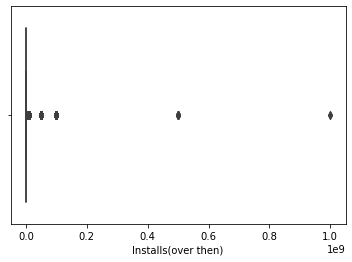

In [47]:
sns.boxplot(data_f['Installs(over then)'])

In [48]:
df3=data_f.copy()

In [49]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8159 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   App                  8159 non-null   object 
 1   Category             8159 non-null   object 
 2   Rating               8159 non-null   float64
 3   Reviews              8159 non-null   int32  
 4   Size(M)              8159 non-null   float64
 5   Free/Paid            8159 non-null   object 
 6   Price($)             8159 non-null   float64
 7   Installs(over then)  8159 non-null   int64  
dtypes: float64(3), int32(1), int64(1), object(3)
memory usage: 541.8+ KB


In [50]:
Rating_group=[]
temp_rating = df3['Rating']
for rate in temp_rating:
    if rate <= 1:
        Rating_group.append(1)
    elif rate <= 2:
        Rating_group.append(2)
    elif rate <= 3:
        Rating_group.append(3)
    elif rate <= 4:
        Rating_group.append(4)
    elif rate <= 5:
        Rating_group.append(5)
df3['Rating_Group'] = Rating_group

In [51]:
Price_Group=[]
temp_price = df3['Price($)']
for price in temp_price:
    if price == 0:
        Price_Group.append(0)
    elif price <= 10:
        Price_Group.append(10)
    elif price <= 20:
            Price_Group.append(20)
    elif price <= 30:
            Price_Group.append(30)
    elif price <= 40:
            Price_Group.append(40)
    elif price <= 50:
            Price_Group.append(50)
df3['Price_Group'] = Price_Group

In [52]:
Size_Group=[]
temp_size = df3['Size(M)']
for size in temp_size:
    if size <= 10:
        Size_Group.append(10)
    elif size <= 20:
        Size_Group.append(20)
    elif size <= 30:
        Size_Group.append(30)
    elif size <= 40:
        Size_Group.append(40)
    elif size <= 50:
        Size_Group.append(50)
    elif size <= 60:
        Size_Group.append(60)
    elif size <= 70:
        Size_Group.append(70)
    elif size <= 80:
        Size_Group.append(80)
    elif size <= 90:
        Size_Group.append(90)
    elif size <= 100:
        Size_Group.append(100)
    #elif math.isnan(size):
        #Size_Group.append(0)       
df3['Size_Group'] = Size_Group

In [54]:
df3['10_million_Installs_and_more'] = df3['Installs(over then)']>=10000000
df3['Between_4_to_5_rate'] = df3['Rating']>=4
df3['Successful_app'] = (df3['10_million_Installs_and_more'] == True) & (df3['Between_4_to_5_rate'] == True)
df3.head()

,App,Category,Rating,Reviews,Size(M),Free/Paid,Price($),Installs(over then),Rating_Group,Price_Group,Size_Group,10_million_Installs_and_more,Between_4_to_5_rate,Successful_app
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,Free,0.0,10000,5,0,20,False,True,False
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,Free,0.0,500000,4,0,20,False,False,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,Free,0.0,5000000,5,0,10,False,True,False
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,Free,0.0,50000000,5,0,30,True,True,True
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,Free,0.0,100000,5,0,10,False,True,False


In [55]:
ct = pd.crosstab(df3['Category'],df3['Free/Paid'])
ct1 = pd.crosstab(df3['Category'],df3['Free/Paid'],normalize='index')
ct2 = pd.crosstab(df3['Installs(over then)'],df3['Rating_Group'])
ct3 = pd.crosstab(df3['Installs(over then)'],df3['Rating_Group'],normalize='index')
ct8 = pd.crosstab(df3['Price_Group'],df3['Rating_Group'])
ct9 = pd.crosstab(df3['Price_Group'],df3['Rating_Group'],normalize='index')
ct10 = pd.crosstab(df3['Installs(over then)'],df3['Free/Paid'])
ct11 = pd.crosstab(df3['Installs(over then)'],df3['Free/Paid'],normalize='index')
ct12 = pd.crosstab(df3['Size_Group'],df3['Rating_Group'])
ct13 = pd.crosstab(df3['Size_Group'],df3['Rating_Group'],normalize='index')
ct16 = pd.crosstab(df3['Category'],df3['10_million_Installs_and_more'])
ct17 = pd.crosstab(df3['Category'],df3['10_million_Installs_and_more'],normalize='index')
ct18 = pd.crosstab(df3['Category'],df3['Between_4_to_5_rate'])
ct19 = pd.crosstab(df3['Category'],df3['Between_4_to_5_rate'],normalize='index')
ct20 = pd.crosstab(df3['Category'],df3['Successful_app'])
ct21 = pd.crosstab(df3['Category'],df3['Successful_app'],normalize='index')
ct22 = pd.crosstab(df3['Size_Group'],df3['Successful_app'])
ct23 = pd.crosstab(df3['Size_Group'],df3['Successful_app'],normalize='index')
ct24 = pd.crosstab(df3['Price_Group'],df3['Successful_app'])
ct25 = pd.crosstab(df3['Price_Group'],df3['Successful_app'],normalize='index')

In [56]:
df3.corr()

,Rating,Reviews,Size(M),Price($),Installs(over then),Rating_Group,Price_Group,Size_Group,10_million_Installs_and_more,Between_4_to_5_rate,Successful_app
Rating,1.000000,0.073843,0.153972,-0.018072,0.081111,0.984028,-0.016185,0.153176,0.178955,0.752380,0.181818
Reviews,0.073843,1.000000,0.188184,-0.020739,0.574404,0.079677,-0.031287,0.187217,0.326208,0.090267,0.339227
Size(M),0.153972,0.188184,1.000000,0.002760,0.141028,0.161777,0.001962,0.992330,0.231638,0.138010,0.239052
Price($),-0.018072,-0.020739,0.002760,1.000000,-0.026343,-0.017434,0.841652,0.004765,-0.059516,-0.004558,-0.056495
Installs(over then),0.081111,0.574404,0.141028,-0.026343,1.000000,0.090101,-0.039798,0.141311,0.389367,0.090557,0.376180
Rating_Group,0.984028,0.079677,0.161777,-0.017434,0.090101,1.000000,-0.016130,0.160455,0.197383,0.793406,0.206550
Price_Group,-0.016185,-0.031287,0.001962,0.841652,-0.039798,-0.016130,1.000000,0.005497,-0.089469,0.005304,-0.084840
Size_Group,0.153176,0.187217,0.992330,0.004765,0.141311,0.160455,0.005497,1.000000,0.228607,0.135618,0.235639
10_million_Installs_and_more,0.178955,0.326208,0.231638,-0.059516,0.389367,0.197383,-0.089469,0.228607,1.000000,0.200420,0.949544
Between_4_to_5_rate,0.752380,0.090267,0.138010,-0.004558,0.090557,0.793406,0.005304,0.135618,0.200420,1.000000,0.251551


Text(0.5, 1.0, 'Number of Categories')

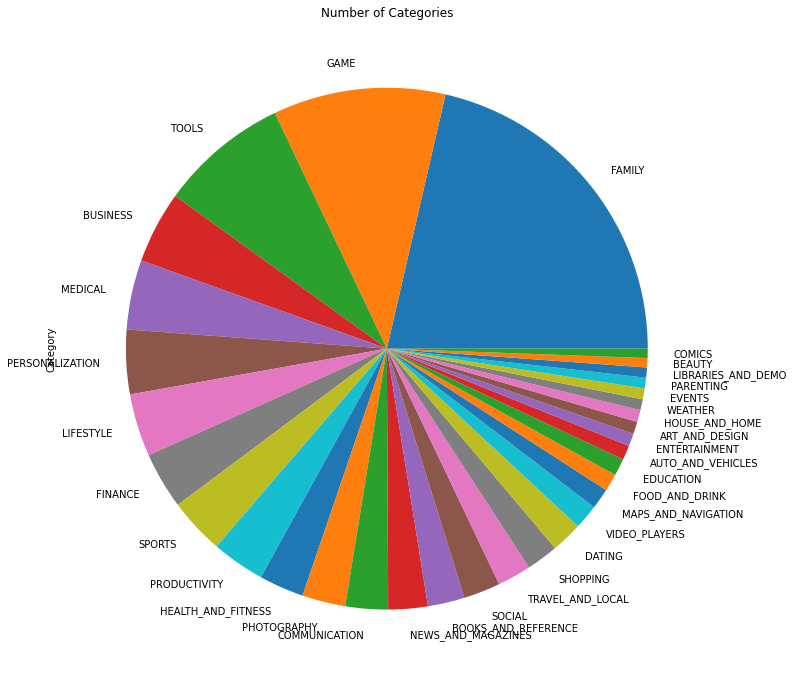

In [57]:
fig1 = plt.figure(figsize=(12,12))
df3['Category'].value_counts().plot(kind='pie')
plt.title('Number of Categories')

Text(0.5, 1.0, 'Rating divide')

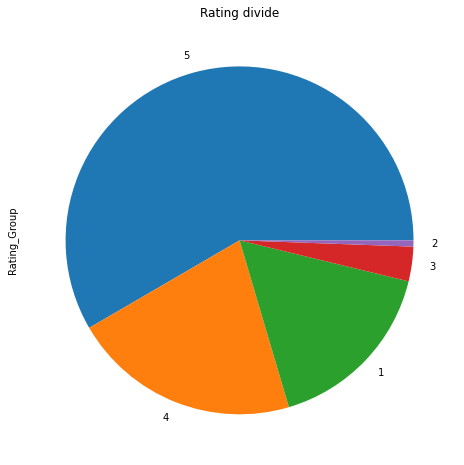

In [58]:
fig2 = plt.figure(figsize=(8,8))
df3['Rating_Group'].value_counts().plot(kind='pie')
plt.title('Rating divide')

Text(0, 0.5, 'count Free/Paid')

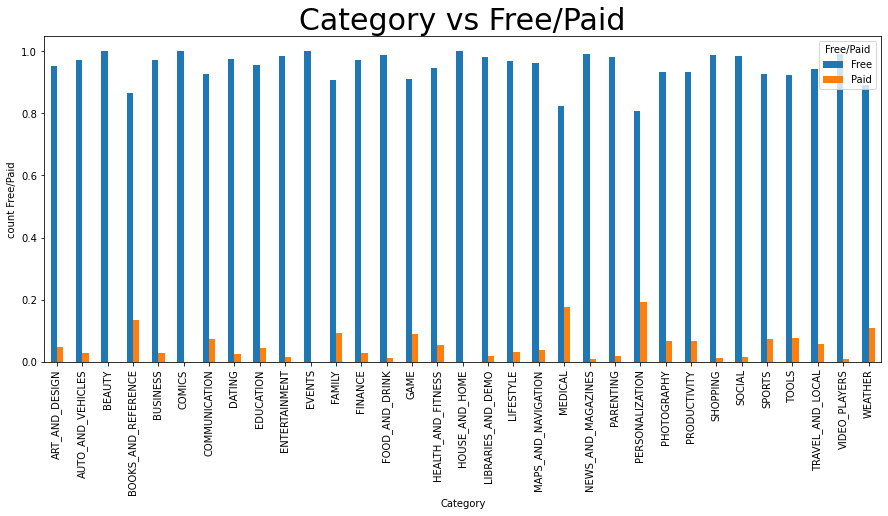

In [59]:
ct1.plot(kind='bar', figsize=(15,6))
plt.title('Category vs Free/Paid',fontsize=30)
plt.xlabel('Category')
plt.ylabel('count Free/Paid')

Text(0, 0.5, ' 10_million_Installs_and_more/Paid')

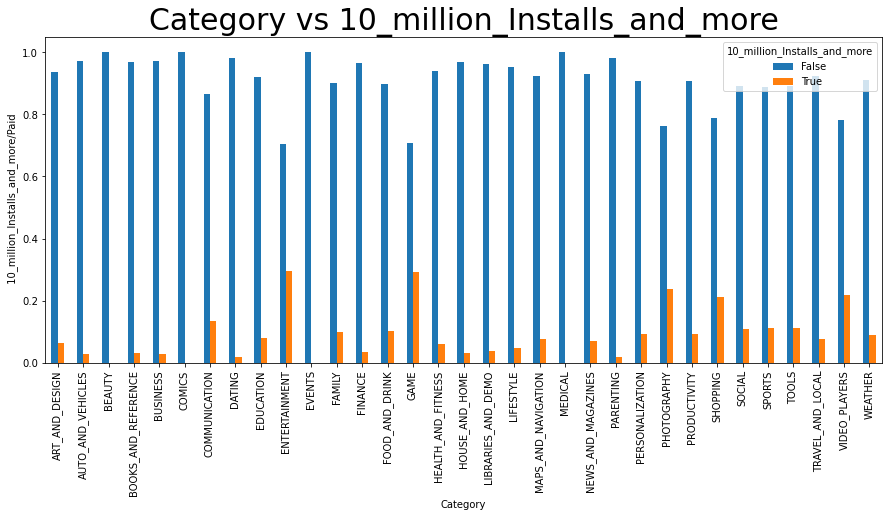

In [60]:
ct17.plot(kind='bar', figsize=(15,6))
plt.title('Category vs 10_million_Installs_and_more',fontsize=30)
plt.xlabel('Category')
plt.ylabel(' 10_million_Installs_and_more/Paid')

Text(0, 0.5, ' Between_4_to_5_rate/Paid')

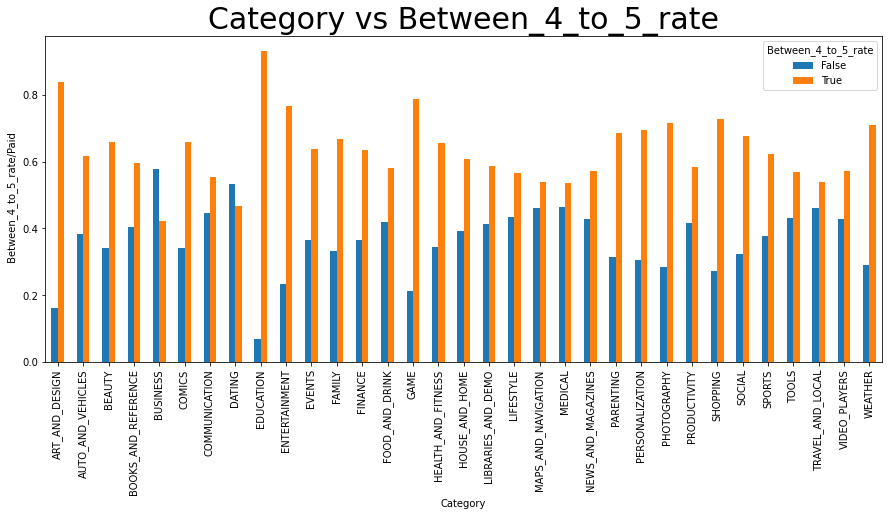

In [61]:
ct19.plot(kind='bar', figsize=(15,6))
plt.title('Category vs Between_4_to_5_rate',fontsize=30)
plt.xlabel('Category')
plt.ylabel(' Between_4_to_5_rate/Paid')


Text(0, 0.5, ' Successful_app')

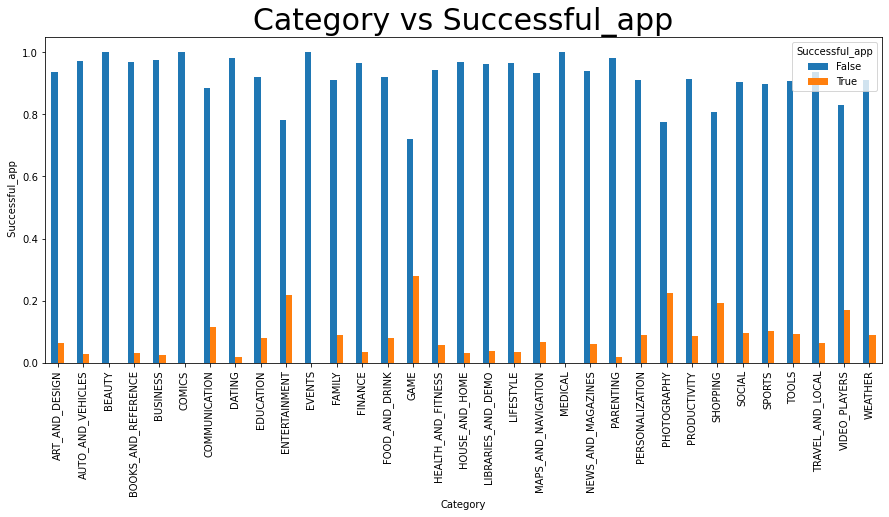

In [62]:
ct21.plot(kind='bar', figsize=(15,6))
plt.title('Category vs Successful_app',fontsize=30)
plt.xlabel('Category')
plt.ylabel(' Successful_app')

In [63]:
categories_list = df3['Category'].unique()
Percent_list=[]
for category in categories_list:
    num = len(df3[(df3['Successful_app'] == True) & (df3['Category'] == category)])/len(df3[df3['Category'] == category])*100
    Percent_list.append(num)
successful_df = pd.DataFrame({'Categories': categories_list,'Success Percent(%)': Percent_list}) 
successful_df.sort_values("Success Percent(%)",ascending=False, inplace=True)
successful_df

,Categories,Success Percent(%)
17,GAME,28.013777
22,PHOTOGRAPHY,22.374429
9,ENTERTAINMENT,21.875000
21,SHOPPING,19.254658
30,VIDEO_PLAYERS,16.935484
6,COMMUNICATION,11.627907
23,SPORTS,10.247350
20,SOCIAL,9.677419
25,TOOLS,9.355828
29,WEATHER,9.090909


Text(0, 0.5, ' Successful_app')

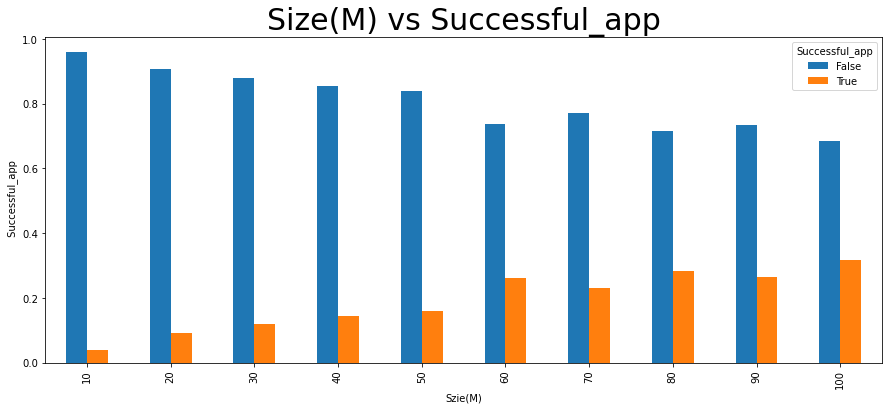

In [64]:
ct23.plot(kind='bar', figsize=(15,6))
plt.title('Size(M) vs Successful_app',fontsize=30)
plt.xlabel('Szie(M)')
plt.ylabel(' Successful_app')

Text(0, 0.5, 'Successful_app')

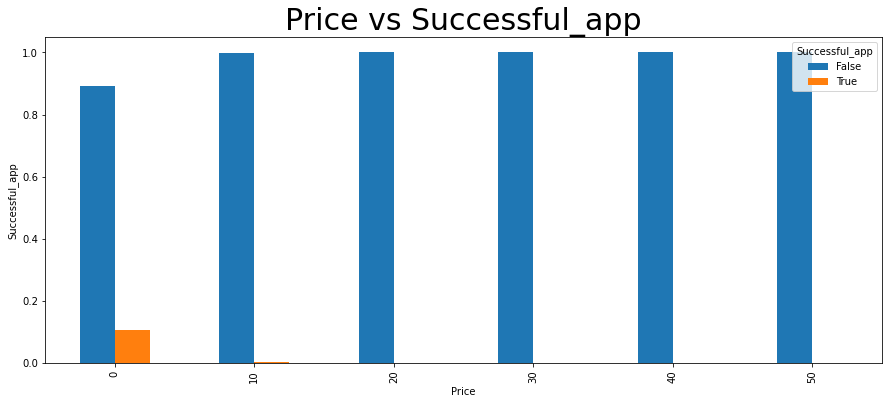

In [65]:
ct25.plot(kind='bar', figsize=(15,6))
plt.title('Price vs Successful_app',fontsize=30)
plt.xlabel('Price')
plt.ylabel('Successful_app')

For any kind of app, you have 9.96% to get successful app


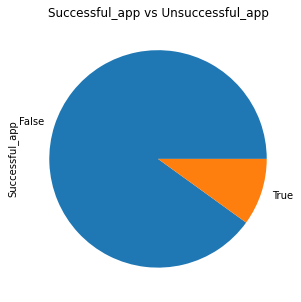

In [66]:
fig5 = plt.figure(figsize=(5,5))
df3['Successful_app'].value_counts().plot(kind='pie')
plt.title('Successful_app vs Unsuccessful_app')
num =len(df3[df3['Successful_app']==True])/len(df3['Successful_app'])*100
print ('For any kind of app, you have %.2f'%(num)+'% to get successful app')

Text(0, 0.5, 'Rating')

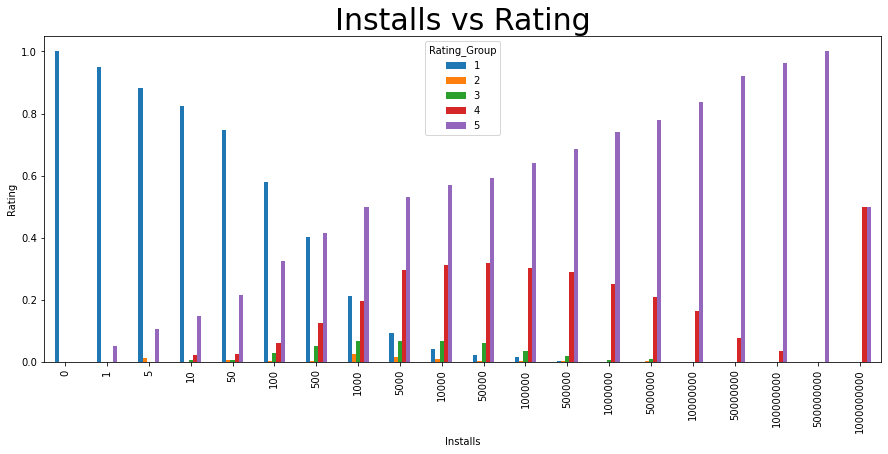

In [68]:
ct3.plot(kind='bar', figsize=(15,6))
plt.title('Installs vs Rating',fontsize=30)
plt.xlabel('Installs')
plt.ylabel('Rating')

In [69]:
chi2_contingency(ct2)

(4562.14910315717,
 0.0,
 76,
 array([[1.66319402e+00, 5.76050987e-02, 3.21117784e-01, 2.11913225e+00,
         5.83895085e+00],
        [9.81284471e+00, 3.39870082e-01, 1.89459493e+00, 1.25028803e+01,
         3.44498100e+01],
        [1.26402745e+01, 4.37798750e-01, 2.44049516e+00, 1.61054051e+01,
         4.43760265e+01],
        [5.97086653e+01, 2.06802304e+00, 1.15281284e+01, 7.60768477e+01,
         2.09618336e+02],
        [3.16006864e+01, 1.09449687e+00, 6.10123790e+00, 4.02635127e+01,
         1.10940066e+02],
        [1.10436083e+02, 3.82497855e+00, 2.13222209e+01, 1.40710381e+02,
         3.87706337e+02],
        [5.18916534e+01, 1.79727908e+00, 1.00188749e+01, 6.61169261e+01,
         1.82175267e+02],
        [1.33055522e+02, 4.60840789e+00, 2.56894227e+01, 1.69530580e+02,
         4.67116068e+02],
        [6.76919966e+01, 2.34452752e+00, 1.30694938e+01, 8.62486824e+01,
         2.37645300e+02],
        [1.54178086e+02, 5.33999265e+00, 2.97676186e+01, 1.96443559e+02,
      

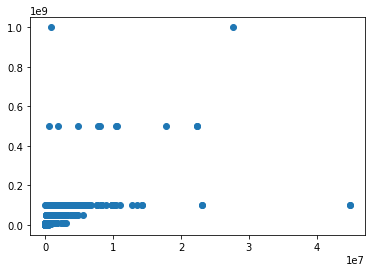

In [70]:
plt.scatter(df3['Reviews'],df3['Installs(over then)'])

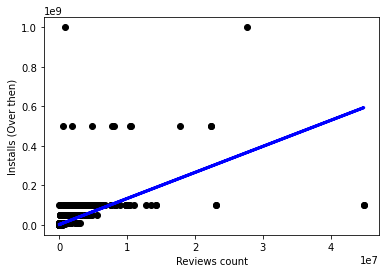

Slope: [[13.16724359]]
Intercept: [2237823.71047935]
R2: 0.32994024203563077


In [71]:
lr_reviews = linear_model.LinearRegression()

x = df3['Reviews'].values.reshape(df3['Reviews'].shape[0],1)
y = df3['Installs(over then)'].values.reshape(df3['Installs(over then)'].shape[0],1)

lr_reviews.fit(X=x, y=y)

plt.scatter(x, y,  color='black')
plt.plot(x, lr_reviews.predict(x), color='blue', linewidth=3)

plt.xlabel('Reviews count')
plt.ylabel('Installs (Over then)')
plt.show()

print("Slope:",lr_reviews.coef_)
print("Intercept:",lr_reviews.intercept_)
print("R2:",lr_reviews.score(x,y))

Text(0, 0.5, 'Rating_Group')

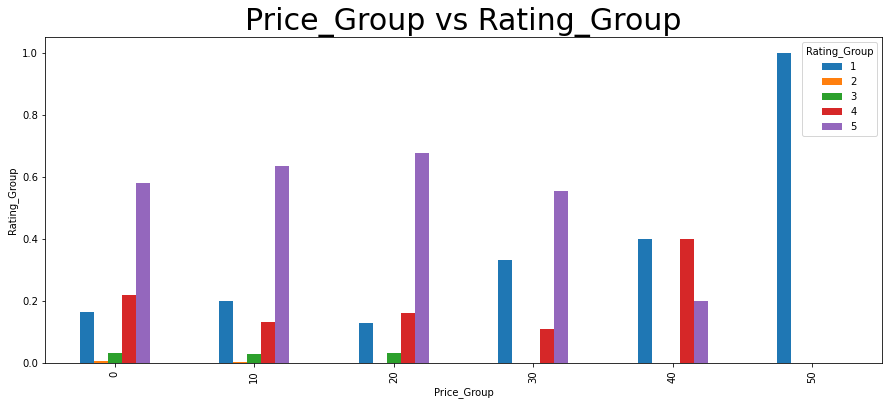

In [72]:

ct9.plot(kind='bar', figsize=(15,6))
plt.title('Price_Group vs Rating_Group',fontsize=30)
plt.xlabel('Price_Group')
plt.ylabel('Rating_Group')

In [73]:
#from scipy.stats import chi2_contingency
chi2_contingency(ct8)
#here we can see that the price and the rate of app are realy connect!

(38.07889892587537,
 0.008661064992551015,
 20,
 array([[1.25787364e+03, 4.35667361e+01, 2.42861380e+02, 1.60269972e+03,
         4.41599853e+03],
        [9.14756710e+01, 3.16828043e+00, 1.76614781e+01, 1.16552274e+02,
         3.21142297e+02],
        [5.15590146e+00, 1.78575806e-01, 9.95465131e-01, 6.56930996e+00,
         1.81007476e+01],
        [1.49687462e+00, 5.18445888e-02, 2.89006006e-01, 1.90721902e+00,
         5.25505577e+00],
        [8.31597009e-01, 2.88025493e-02, 1.60558892e-01, 1.05956612e+00,
         2.91947543e+00],
        [1.66319402e-01, 5.76050987e-03, 3.21117784e-02, 2.11913225e-01,
         5.83895085e-01]]))

Text(0, 0.5, 'Free/Paid')

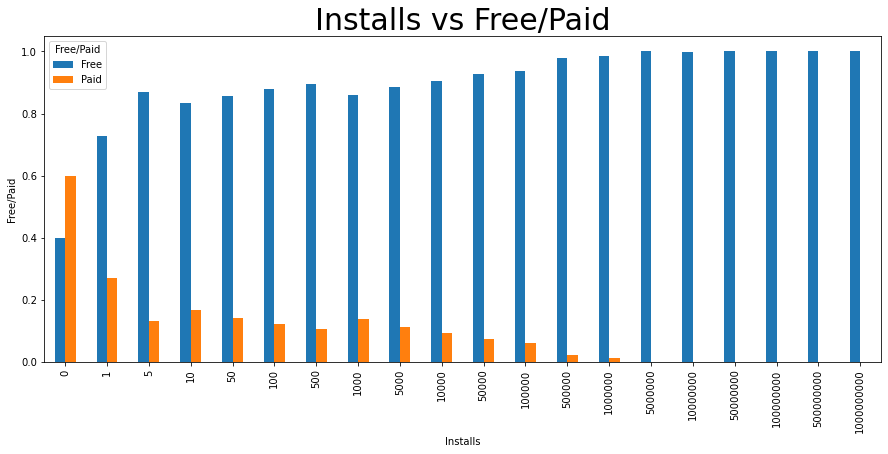

In [74]:
ct11.plot(kind='bar', figsize=(15,6))
plt.title('Installs vs Free/Paid',fontsize=30)
plt.xlabel('Installs')
plt.ylabel('Free/Paid')

Text(0, 0.5, 'Rating_Group')

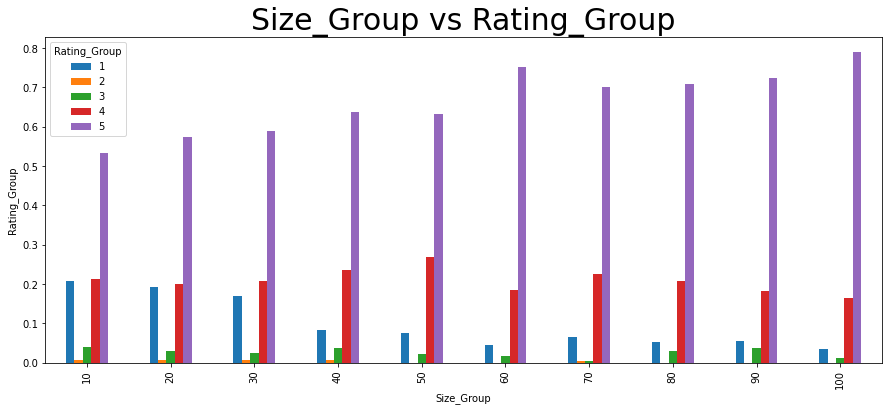

In [75]:
ct13.plot(kind='bar', figsize=(15,6))
plt.title('Size_Group vs Rating_Group',fontsize=30)
plt.xlabel('Size_Group')
plt.ylabel('Rating_Group')

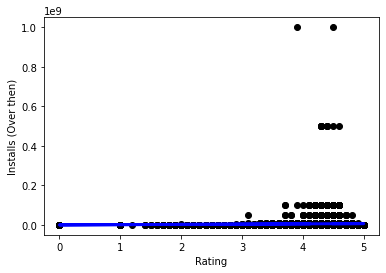

Slope: [[1329920.23336917]]
Intercept: [-470575.27547641]
R2: 0.006579005566598295


In [76]:
lr_rating = linear_model.LinearRegression() # create a linear regression object

# scikit-learn doesn't work as well with pandas, so we have to extract values 
x = df3['Rating'].values.reshape(df3['Rating'].shape[0],1)
y = df3['Installs(over then)'].values.reshape(df3['Installs(over then)'].shape[0],1)

lr_rating.fit(X=x, y=y)

plt.scatter(x, y,  color='black')
plt.plot(x, lr_rating.predict(x), color='blue', linewidth=3)

plt.xlabel('Rating')
plt.ylabel('Installs (Over then)')
plt.show()

print("Slope:",lr_rating.coef_)
print("Intercept:",lr_rating.intercept_)
print("R2:",lr_rating.score(x,y))

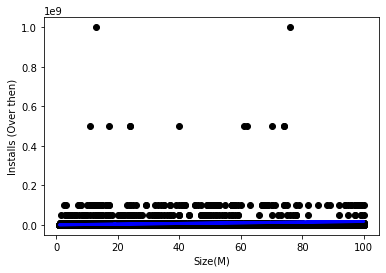

Slope: [[170932.89265309]]
Intercept: [518796.56233548]
R2: 0.0198889553844539


In [77]:
lr_size = linear_model.LinearRegression() # create a linear regression object

# scikit-learn doesn't work as well with pandas, so we have to extract values 
x = df3['Size(M)'].values.reshape(df3['Size(M)'].shape[0],1)
y = df3['Installs(over then)'].values.reshape(df3['Installs(over then)'].shape[0],1)

lr_size.fit(X=x, y=y)

plt.scatter(x, y,  color='black')
plt.plot(x, lr_size.predict(x), color='blue', linewidth=3)

plt.xlabel('Size(M)')
plt.ylabel('Installs (Over then)')
plt.show()

print("Slope:",lr_size.coef_)
print("Intercept:",lr_size.intercept_)
print("R2:",lr_size.score(x,y))

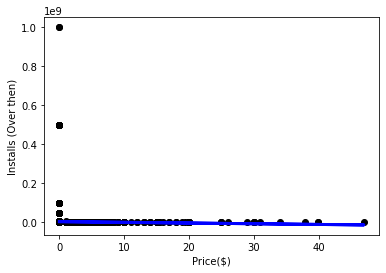

Slope: [[-357386.7234242]]
Intercept: [4282558.78036629]
R2: 0.0006939630419641185


In [78]:
lr_price = linear_model.LinearRegression() # create a linear regression object

# scikit-learn doesn't work as well with pandas, so we have to extract values 
x = df3['Price($)'].values.reshape(df3['Price($)'].shape[0],1)
y = df3['Installs(over then)'].values.reshape(df3['Installs(over then)'].shape[0],1)

lr_price.fit(X=x, y=y)

plt.scatter(x, y,  color='black')
plt.plot(x, lr_price.predict(x), color='blue', linewidth=3)

plt.xlabel('Price($)')
plt.ylabel('Installs (Over then)')
plt.show()

print("Slope:",lr_price.coef_)
print("Intercept:",lr_price.intercept_)
print("R2:",lr_price.score(x,y))

In [79]:
df3.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size(M)', 'Free/Paid',
       'Price($)', 'Installs(over then)', 'Rating_Group', 'Price_Group',
       'Size_Group', '10_million_Installs_and_more', 'Between_4_to_5_rate',
       'Successful_app'],
      dtype='object')

In [80]:
df_above_10M = df3.drop(['App','Category','Free/Paid','Rating_Group','Installs(over then)','Price_Group','Size_Group'],axis=1)

In [82]:
df_above_10M.drop(['Between_4_to_5_rate', 'Successful_app'],axis=1, inplace=True)

In [83]:
df_above_10M

,Rating,Reviews,Size(M),Price($),10_million_Installs_and_more
0,4.1,159,19.0,0.0,False
1,3.9,967,14.0,0.0,False
2,4.7,87510,8.7,0.0,False
3,4.5,215644,25.0,0.0,True
4,4.3,967,2.8,0.0,False
...,...,...,...,...,...
10835,0.0,0,9.6,0.0,False
10836,4.5,38,53.0,0.0,False
10837,5.0,4,3.6,0.0,False
10838,0.0,3,9.5,0.0,False


In [84]:
xtrain, xtest, ytrain, ytest = train_test_split(df_above_10M.drop('10_million_Installs_and_more',axis=1),df_above_10M['10_million_Installs_and_more'],random_state = 0)

In [85]:
clf=LogisticRegression()
clf.fit(xtrain,ytrain)
acc=clf.score(xtest,ytest)

print(f"accuracy is {acc}")

accuracy is 0.9514705882352941
